# 데이터 확인과 실행

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('../dataset/wine.csv', header=None)
# sample()는 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수.
# frac=1은 100%
df = df_pre.sample(frac=1)  

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Using TensorFlow backend.


Epoch 1/200
6497/6497 [==============================] - 0s 23us/step - loss: 3.5327 - accuracy: 0.2461
Epoch 2/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.4323 - accuracy: 0.8116
Epoch 3/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.2417 - accuracy: 0.9255
Epoch 4/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.2142 - accuracy: 0.9300
Epoch 5/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.2040 - accuracy: 0.9306
Epoch 6/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.1985 - accuracy: 0.9312
Epoch 7/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.1940 - accuracy: 0.9321
Epoch 8/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.1891 - accuracy: 0.9323
Epoch 9/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.1867 - accuracy: 0.9327
Epoch 10/200
6497/6497 [==============================] - 0s 6us/step - 

6497/6497 [==============================] - 0s 6us/step - loss: 0.0611 - accuracy: 0.9825
Epoch 80/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0591 - accuracy: 0.9825
Epoch 81/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0601 - accuracy: 0.9823
Epoch 82/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0620 - accuracy: 0.9820
Epoch 83/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0567 - accuracy: 0.9831
Epoch 84/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0563 - accuracy: 0.9843
Epoch 85/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0561 - accuracy: 0.9831
Epoch 86/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0572 - accuracy: 0.9834
Epoch 87/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0714 - accuracy: 0.9788
Epoch 88/200
6497/6497 [==============================] - 0s 6us/step - loss:

6497/6497 [==============================] - 0s 8us/step - loss: 0.0516 - accuracy: 0.9849
Epoch 157/200
6497/6497 [==============================] - 0s 8us/step - loss: 0.0549 - accuracy: 0.9838
Epoch 158/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.0510 - accuracy: 0.9852
Epoch 159/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0496 - accuracy: 0.9857
Epoch 160/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0622 - accuracy: 0.9795
Epoch 161/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.0486 - accuracy: 0.9865
Epoch 162/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.0496 - accuracy: 0.9855
Epoch 163/200
6497/6497 [==============================] - 0s 8us/step - loss: 0.0492 - accuracy: 0.9857
Epoch 164/200
6497/6497 [==============================] - 0s 8us/step - loss: 0.0506 - accuracy: 0.9863
Epoch 165/200
6497/6497 [==============================] - 0s 7us/ste

# 모델 업데이트

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
# 에포크마다 모델의 정확도를 저장할 폴더
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): # 폴더가 존재하지 않으면
   os.mkdir(MODEL_DIR) # 이 이름의 폴더 생성

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"  # 파일명: 에포크 횟수-오차값.hdf5 

# checkpointer에 모니터할 값 지정
# val_loss : 테스트 오차(케라스 내부에서 기록되는 값)
# 모델이 저장될 곳 : 위에서 생성한 파일 modelpath
# verbose가 1이면 해당함수 진행사항 출력, 0이면 출력 안함.
# save_best_only=True 로 하면 테스트 오차(var_loss)를 실행한 결과값이 향상됐을 때만 저장함
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
# 모델을 학습할 때마다 checkpointer의 값을 받아 지정된 곳에 모델 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])



Epoch 00001: val_loss improved from inf to 0.35610, saving model to ./model/01-0.3561.hdf5

Epoch 00002: val_loss improved from 0.35610 to 0.31389, saving model to ./model/02-0.3139.hdf5

Epoch 00003: val_loss improved from 0.31389 to 0.29009, saving model to ./model/03-0.2901.hdf5

Epoch 00004: val_loss improved from 0.29009 to 0.27175, saving model to ./model/04-0.2717.hdf5

Epoch 00005: val_loss improved from 0.27175 to 0.24877, saving model to ./model/05-0.2488.hdf5

Epoch 00006: val_loss improved from 0.24877 to 0.23043, saving model to ./model/06-0.2304.hdf5

Epoch 00007: val_loss improved from 0.23043 to 0.21562, saving model to ./model/07-0.2156.hdf5

Epoch 00008: val_loss improved from 0.21562 to 0.20289, saving model to ./model/08-0.2029.hdf5

Epoch 00009: val_loss improved from 0.20289 to 0.19321, saving model to ./model/09-0.1932.hdf5

Epoch 00010: val_loss improved from 0.19321 to 0.18575, saving model to ./model/10-0.1857.hdf5

Epoch 00011: val_loss improved from 0.18575


Epoch 00114: val_loss did not improve from 0.05134

Epoch 00115: val_loss did not improve from 0.05134

Epoch 00116: val_loss did not improve from 0.05134

Epoch 00117: val_loss did not improve from 0.05134

Epoch 00118: val_loss improved from 0.05134 to 0.05052, saving model to ./model/118-0.0505.hdf5

Epoch 00119: val_loss did not improve from 0.05052

Epoch 00120: val_loss improved from 0.05052 to 0.05032, saving model to ./model/120-0.0503.hdf5

Epoch 00121: val_loss did not improve from 0.05032

Epoch 00122: val_loss did not improve from 0.05032

Epoch 00123: val_loss did not improve from 0.05032

Epoch 00124: val_loss did not improve from 0.05032

Epoch 00125: val_loss did not improve from 0.05032

Epoch 00126: val_loss did not improve from 0.05032

Epoch 00127: val_loss did not improve from 0.05032

Epoch 00128: val_loss did not improve from 0.05032

Epoch 00129: val_loss improved from 0.05032 to 0.04860, saving model to ./model/129-0.0486.hdf5

Epoch 00130: val_loss did not im

# 그래프로 확인

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 201us/step - loss: 1.2627 - accuracy: 0.7259 - val_loss: 0.8876 - val_accuracy: 0.7547
Epoch 2/3500
653/653 [==============================] - 0s 16us/step - loss: 1.0749 - accuracy: 0.7259 - val_loss: 0.7565 - val_accuracy: 0.7547
Epoch 3/3500
653/653 [==============================] - 0s 14us/step - loss: 0.9036 - accuracy: 0.7259 - val_loss: 0.6433 - val_accuracy: 0.7547
Epoch 4/3500
653/653 [==============================] - 0s 19us/step - loss: 0.7630 - accuracy: 0.7259 - val_loss: 0.5516 - val_accuracy: 0.7547
Epoch 5/3500
653/653 [==============================] - 0s 14us/step - loss: 0.6467 - accuracy: 0.7259 - val_loss: 0.4758 - val_accuracy: 0.7547
Epoch 6/3500
653/653 [==============================] - 0s 15us/step - loss: 0.5572 - accuracy: 0.7259 - val_loss: 0.4203 - val_accuracy: 0.7547
Epoch 7/3500
653/653 [==============================] - 0s 11us/step - loss: 0.4870

Epoch 57/3500
653/653 [==============================] - 0s 13us/step - loss: 0.2991 - accuracy: 0.9250 - val_loss: 0.2677 - val_accuracy: 0.9317
Epoch 58/3500
653/653 [==============================] - 0s 14us/step - loss: 0.2975 - accuracy: 0.9234 - val_loss: 0.2664 - val_accuracy: 0.9286
Epoch 59/3500
653/653 [==============================] - 0s 10us/step - loss: 0.2957 - accuracy: 0.9250 - val_loss: 0.2647 - val_accuracy: 0.9286
Epoch 60/3500
653/653 [==============================] - 0s 17us/step - loss: 0.2942 - accuracy: 0.9250 - val_loss: 0.2630 - val_accuracy: 0.9286
Epoch 61/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2926 - accuracy: 0.9250 - val_loss: 0.2620 - val_accuracy: 0.9255
Epoch 62/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2910 - accuracy: 0.9280 - val_loss: 0.2616 - val_accuracy: 0.9255
Epoch 63/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2894 - accuracy: 0.9296 - val_loss: 0.2608 -

653/653 [==============================] - 0s 11us/step - loss: 0.2299 - accuracy: 0.9387 - val_loss: 0.1991 - val_accuracy: 0.9441
Epoch 114/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2290 - accuracy: 0.9387 - val_loss: 0.1967 - val_accuracy: 0.9441
Epoch 115/3500
653/653 [==============================] - 0s 12us/step - loss: 0.2286 - accuracy: 0.9357 - val_loss: 0.1952 - val_accuracy: 0.9441
Epoch 116/3500
653/653 [==============================] - 0s 10us/step - loss: 0.2284 - accuracy: 0.9357 - val_loss: 0.1941 - val_accuracy: 0.9441
Epoch 117/3500
653/653 [==============================] - 0s 10us/step - loss: 0.2278 - accuracy: 0.9357 - val_loss: 0.1944 - val_accuracy: 0.9441
Epoch 118/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2262 - accuracy: 0.9387 - val_loss: 0.1966 - val_accuracy: 0.9379
Epoch 119/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2258 - accuracy: 0.9403 - val_loss: 0.1986 - val_acc

Epoch 169/3500
653/653 [==============================] - 0s 8us/step - loss: 0.2000 - accuracy: 0.9403 - val_loss: 0.1682 - val_accuracy: 0.9472
Epoch 170/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2054 - accuracy: 0.9357 - val_loss: 0.1679 - val_accuracy: 0.9472
Epoch 171/3500
653/653 [==============================] - 0s 8us/step - loss: 0.2037 - accuracy: 0.9372 - val_loss: 0.1686 - val_accuracy: 0.9503
Epoch 172/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1984 - accuracy: 0.9387 - val_loss: 0.1761 - val_accuracy: 0.9503
Epoch 173/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1984 - accuracy: 0.9464 - val_loss: 0.1813 - val_accuracy: 0.9410
Epoch 174/3500
653/653 [==============================] - 0s 10us/step - loss: 0.1995 - accuracy: 0.9449 - val_loss: 0.1756 - val_accuracy: 0.9503
Epoch 175/3500
653/653 [==============================] - 0s 8us/step - loss: 0.1973 - accuracy: 0.9449 - val_loss: 0.1691

Epoch 225/3500
653/653 [==============================] - 0s 17us/step - loss: 0.1760 - accuracy: 0.9433 - val_loss: 0.1529 - val_accuracy: 0.9503
Epoch 226/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1737 - accuracy: 0.9464 - val_loss: 0.1575 - val_accuracy: 0.9565
Epoch 227/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1739 - accuracy: 0.9464 - val_loss: 0.1635 - val_accuracy: 0.9565
Epoch 228/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1763 - accuracy: 0.9464 - val_loss: 0.1579 - val_accuracy: 0.9565
Epoch 229/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1730 - accuracy: 0.9464 - val_loss: 0.1506 - val_accuracy: 0.9503
Epoch 230/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1737 - accuracy: 0.9433 - val_loss: 0.1497 - val_accuracy: 0.9503
Epoch 231/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1753 - accuracy: 0.9449 - val_loss: 0

Epoch 281/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1553 - accuracy: 0.9541 - val_loss: 0.1454 - val_accuracy: 0.9627
Epoch 282/3500
653/653 [==============================] - 0s 13us/step - loss: 0.1542 - accuracy: 0.9510 - val_loss: 0.1378 - val_accuracy: 0.9596
Epoch 283/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1515 - accuracy: 0.9464 - val_loss: 0.1355 - val_accuracy: 0.9565
Epoch 284/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1536 - accuracy: 0.9479 - val_loss: 0.1357 - val_accuracy: 0.9565
Epoch 285/3500
653/653 [==============================] - 0s 13us/step - loss: 0.1524 - accuracy: 0.9479 - val_loss: 0.1401 - val_accuracy: 0.9627
Epoch 286/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1514 - accuracy: 0.9479 - val_loss: 0.1402 - val_accuracy: 0.9627
Epoch 287/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1509 - accuracy: 0.9479 - val_loss: 0

Epoch 337/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1331 - accuracy: 0.9587 - val_loss: 0.1315 - val_accuracy: 0.9658
Epoch 338/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1338 - accuracy: 0.9617 - val_loss: 0.1310 - val_accuracy: 0.9658
Epoch 339/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1330 - accuracy: 0.9617 - val_loss: 0.1270 - val_accuracy: 0.9627
Epoch 340/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1322 - accuracy: 0.9617 - val_loss: 0.1249 - val_accuracy: 0.9627
Epoch 341/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1338 - accuracy: 0.9587 - val_loss: 0.1246 - val_accuracy: 0.9596
Epoch 342/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1339 - accuracy: 0.9571 - val_loss: 0.1248 - val_accuracy: 0.9627
Epoch 343/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1325 - accuracy: 0.9602 - val_loss: 0

Epoch 393/3500
653/653 [==============================] - 0s 20us/step - loss: 0.1202 - accuracy: 0.9694 - val_loss: 0.1210 - val_accuracy: 0.9658
Epoch 394/3500
653/653 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9694 - val_loss: 0.1228 - val_accuracy: 0.9658
Epoch 395/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1209 - accuracy: 0.9694 - val_loss: 0.1205 - val_accuracy: 0.9658
Epoch 396/3500
653/653 [==============================] - 0s 18us/step - loss: 0.1193 - accuracy: 0.9694 - val_loss: 0.1194 - val_accuracy: 0.9658
Epoch 397/3500
653/653 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9694 - val_loss: 0.1180 - val_accuracy: 0.9689
Epoch 398/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1198 - accuracy: 0.9648 - val_loss: 0.1180 - val_accuracy: 0.9689
Epoch 399/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1200 - accuracy: 0.9648 - val_loss: 0

Epoch 449/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1106 - accuracy: 0.9755 - val_loss: 0.1126 - val_accuracy: 0.9689
Epoch 450/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1102 - accuracy: 0.9740 - val_loss: 0.1112 - val_accuracy: 0.9689
Epoch 451/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1115 - accuracy: 0.9709 - val_loss: 0.1110 - val_accuracy: 0.9689
Epoch 452/3500
653/653 [==============================] - 0s 10us/step - loss: 0.1098 - accuracy: 0.9709 - val_loss: 0.1162 - val_accuracy: 0.9658
Epoch 453/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1110 - accuracy: 0.9724 - val_loss: 0.1135 - val_accuracy: 0.9689
Epoch 454/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1093 - accuracy: 0.9740 - val_loss: 0.1108 - val_accuracy: 0.9689
Epoch 455/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1102 - accuracy: 0.9678 - val_loss: 0.

Epoch 505/3500
653/653 [==============================] - 0s 10us/step - loss: 0.1026 - accuracy: 0.9724 - val_loss: 0.1065 - val_accuracy: 0.9689
Epoch 506/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1010 - accuracy: 0.9770 - val_loss: 0.1115 - val_accuracy: 0.9658
Epoch 507/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1025 - accuracy: 0.9755 - val_loss: 0.1069 - val_accuracy: 0.9689
Epoch 508/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1006 - accuracy: 0.9770 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 509/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1016 - accuracy: 0.9770 - val_loss: 0.1053 - val_accuracy: 0.9689
Epoch 510/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1014 - accuracy: 0.9755 - val_loss: 0.1057 - val_accuracy: 0.9689
Epoch 511/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1001 - accuracy: 0.9770 - val_loss: 0.

Epoch 561/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0933 - accuracy: 0.9801 - val_loss: 0.1022 - val_accuracy: 0.9689
Epoch 562/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0934 - accuracy: 0.9801 - val_loss: 0.1023 - val_accuracy: 0.9689
Epoch 563/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0934 - accuracy: 0.9801 - val_loss: 0.1018 - val_accuracy: 0.9689
Epoch 564/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0929 - accuracy: 0.9801 - val_loss: 0.1004 - val_accuracy: 0.9689
Epoch 565/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0930 - accuracy: 0.9786 - val_loss: 0.1000 - val_accuracy: 0.9689
Epoch 566/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0924 - accuracy: 0.9786 - val_loss: 0.1018 - val_accuracy: 0.9689
Epoch 567/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0933 - accuracy: 0.9801 - val_loss: 0

Epoch 617/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0855 - accuracy: 0.9816 - val_loss: 0.0953 - val_accuracy: 0.9720
Epoch 618/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0851 - accuracy: 0.9816 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 619/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0852 - accuracy: 0.9816 - val_loss: 0.0952 - val_accuracy: 0.9720
Epoch 620/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0844 - accuracy: 0.9816 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 621/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0858 - accuracy: 0.9832 - val_loss: 0.0971 - val_accuracy: 0.9752
Epoch 622/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0846 - accuracy: 0.9832 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 623/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0848 - accuracy: 0.9801 - val_loss: 0

Epoch 673/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0751 - accuracy: 0.9801 - val_loss: 0.0897 - val_accuracy: 0.9720
Epoch 674/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0743 - accuracy: 0.9801 - val_loss: 0.0880 - val_accuracy: 0.9689
Epoch 675/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0739 - accuracy: 0.9816 - val_loss: 0.0875 - val_accuracy: 0.9689
Epoch 676/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0734 - accuracy: 0.9801 - val_loss: 0.0870 - val_accuracy: 0.9720
Epoch 677/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0739 - accuracy: 0.9801 - val_loss: 0.0874 - val_accuracy: 0.9689
Epoch 678/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0732 - accuracy: 0.9801 - val_loss: 0.0884 - val_accuracy: 0.9720
Epoch 679/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0732 - accuracy: 0.9801 - val_loss: 0

Epoch 729/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0635 - accuracy: 0.9786 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 730/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0635 - accuracy: 0.9786 - val_loss: 0.0835 - val_accuracy: 0.9783
Epoch 731/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0641 - accuracy: 0.9786 - val_loss: 0.0822 - val_accuracy: 0.9783
Epoch 732/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0812 - val_accuracy: 0.9752
Epoch 733/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0645 - accuracy: 0.9786 - val_loss: 0.0815 - val_accuracy: 0.9752
Epoch 734/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0844 - val_accuracy: 0.9783
Epoch 735/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0

Epoch 785/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0819 - val_accuracy: 0.9783
Epoch 786/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0556 - accuracy: 0.9816 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 787/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0606 - accuracy: 0.9801 - val_loss: 0.0809 - val_accuracy: 0.9752
Epoch 788/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0836 - val_accuracy: 0.9783
Epoch 789/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0814 - val_accuracy: 0.9752
Epoch 790/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 791/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0

Epoch 841/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0536 - accuracy: 0.9847 - val_loss: 0.0817 - val_accuracy: 0.9783
Epoch 842/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0850 - val_accuracy: 0.9783
Epoch 843/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.0825 - val_accuracy: 0.9783
Epoch 844/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0824 - val_accuracy: 0.9783
Epoch 845/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0537 - accuracy: 0.9847 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 846/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0547 - accuracy: 0.9847 - val_loss: 0.0816 - val_accuracy: 0.9752
Epoch 847/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0

Epoch 897/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 898/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.0834 - val_accuracy: 0.9783
Epoch 899/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0457 - accuracy: 0.9847 - val_loss: 0.0815 - val_accuracy: 0.9783
Epoch 900/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0481 - accuracy: 0.9832 - val_loss: 0.0820 - val_accuracy: 0.9783
Epoch 901/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 0.0840 - val_accuracy: 0.9783
Epoch 902/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.0882 - val_accuracy: 0.9783
Epoch 903/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0

Epoch 953/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0860 - val_accuracy: 0.9814
Epoch 954/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0822 - val_accuracy: 0.9752
Epoch 955/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0436 - accuracy: 0.9847 - val_loss: 0.0829 - val_accuracy: 0.9783
Epoch 956/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0843 - val_accuracy: 0.9783
Epoch 957/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0418 - accuracy: 0.9847 - val_loss: 0.0926 - val_accuracy: 0.9720
Epoch 958/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0479 - accuracy: 0.9816 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 959/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.

Epoch 1009/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0917 - val_accuracy: 0.9783
Epoch 1010/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0419 - accuracy: 0.9877 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 1011/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0396 - accuracy: 0.9862 - val_loss: 0.0873 - val_accuracy: 0.9783
Epoch 1012/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0843 - val_accuracy: 0.9752
Epoch 1013/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0394 - accuracy: 0.9862 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 1014/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0496 - accuracy: 0.9832 - val_loss: 0.0913 - val_accuracy: 0.9752
Epoch 1015/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0438 - accuracy: 0.9862 - val_lo

Epoch 1064/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0452 - accuracy: 0.9847 - val_loss: 0.0850 - val_accuracy: 0.9783
Epoch 1065/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0372 - accuracy: 0.9862 - val_loss: 0.0937 - val_accuracy: 0.9720
Epoch 1066/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0432 - accuracy: 0.9832 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 1067/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0439 - accuracy: 0.9847 - val_loss: 0.0844 - val_accuracy: 0.9783
Epoch 1068/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0427 - accuracy: 0.9847 - val_loss: 0.0884 - val_accuracy: 0.9783
Epoch 1069/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0424 - accuracy: 0.9847 - val_loss: 0.0861 - val_accuracy: 0.9814
Epoch 1070/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0381 - accuracy: 0.9847 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0361 - accuracy: 0.9862 - val_loss: 0.0873 - val_accuracy: 0.9814
Epoch 1120/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0353 - accuracy: 0.9862 - val_loss: 0.0867 - val_accuracy: 0.9783
Epoch 1121/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0357 - accuracy: 0.9862 - val_loss: 0.0865 - val_accuracy: 0.9814
Epoch 1122/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0348 - accuracy: 0.9862 - val_loss: 0.0873 - val_accuracy: 0.9845
Epoch 1123/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0349 - accuracy: 0.9862 - val_loss: 0.0874 - val_accuracy: 0.9845
Epoch 1124/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0349 - accuracy: 0.9862 - val_loss: 0.0867 - val_accuracy: 0.9814
Epoch 1125/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0348 - accuracy: 0.9862 - val_loss: 0.0869 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0338 - accuracy: 0.9877 - val_loss: 0.0873 - val_accuracy: 0.9845
Epoch 1175/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0334 - accuracy: 0.9877 - val_loss: 0.0868 - val_accuracy: 0.9845
Epoch 1176/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0332 - accuracy: 0.9862 - val_loss: 0.0868 - val_accuracy: 0.9814
Epoch 1177/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0334 - accuracy: 0.9847 - val_loss: 0.0867 - val_accuracy: 0.9845
Epoch 1178/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0332 - accuracy: 0.9847 - val_loss: 0.0873 - val_accuracy: 0.9845
Epoch 1179/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0331 - accuracy: 0.9847 - val_loss: 0.0875 - val_accuracy: 0.9845
Epoch 1180/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0328 - accuracy: 0.9847 - val_loss: 0.0878 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0327 - accuracy: 0.9847 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 1230/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0326 - accuracy: 0.9862 - val_loss: 0.0879 - val_accuracy: 0.9814
Epoch 1231/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0323 - accuracy: 0.9862 - val_loss: 0.0885 - val_accuracy: 0.9814
Epoch 1232/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0325 - accuracy: 0.9862 - val_loss: 0.0888 - val_accuracy: 0.9814
Epoch 1233/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0323 - accuracy: 0.9862 - val_loss: 0.0895 - val_accuracy: 0.9814
Epoch 1234/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0318 - accuracy: 0.9862 - val_loss: 0.0892 - val_accuracy: 0.9814
Epoch 1235/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0318 - accuracy: 0.9847 - val_loss: 0.0895 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0311 - accuracy: 0.9862 - val_loss: 0.0891 - val_accuracy: 0.9814
Epoch 1285/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0312 - accuracy: 0.9862 - val_loss: 0.0886 - val_accuracy: 0.9845
Epoch 1286/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0313 - accuracy: 0.9877 - val_loss: 0.0885 - val_accuracy: 0.9845
Epoch 1287/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0304 - accuracy: 0.9877 - val_loss: 0.0876 - val_accuracy: 0.9814
Epoch 1288/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0307 - accuracy: 0.9847 - val_loss: 0.0878 - val_accuracy: 0.9814
Epoch 1289/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0314 - accuracy: 0.9877 - val_loss: 0.0884 - val_accuracy: 0.9783
Epoch 1290/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0323 - accuracy: 0.9877 - val_loss: 0.0867 - val_acc

653/653 [==============================] - 0s 12us/step - loss: 0.0322 - accuracy: 0.9923 - val_loss: 0.0896 - val_accuracy: 0.9814
Epoch 1340/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0866 - val_accuracy: 0.9845
Epoch 1341/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0292 - accuracy: 0.9862 - val_loss: 0.0869 - val_accuracy: 0.9814
Epoch 1342/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0296 - accuracy: 0.9862 - val_loss: 0.0870 - val_accuracy: 0.9814
Epoch 1343/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0295 - accuracy: 0.9862 - val_loss: 0.0872 - val_accuracy: 0.9814
Epoch 1344/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0297 - accuracy: 0.9862 - val_loss: 0.0874 - val_accuracy: 0.9814
Epoch 1345/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0300 - accuracy: 0.9847 - val_loss: 0.0871 - val_

653/653 [==============================] - 0s 9us/step - loss: 0.0301 - accuracy: 0.9877 - val_loss: 0.0893 - val_accuracy: 0.9814
Epoch 1395/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0909 - val_accuracy: 0.9814
Epoch 1396/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0895 - val_accuracy: 0.9814
Epoch 1397/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0286 - accuracy: 0.9877 - val_loss: 0.0890 - val_accuracy: 0.9845
Epoch 1398/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0279 - accuracy: 0.9877 - val_loss: 0.0890 - val_accuracy: 0.9814
Epoch 1399/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.0886 - val_accuracy: 0.9845
Epoch 1400/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.0883 - val_ac

653/653 [==============================] - 0s 16us/step - loss: 0.0292 - accuracy: 0.9877 - val_loss: 0.0883 - val_accuracy: 0.9783
Epoch 1450/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0317 - accuracy: 0.9862 - val_loss: 0.0863 - val_accuracy: 0.9814
Epoch 1451/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0285 - accuracy: 0.9862 - val_loss: 0.0858 - val_accuracy: 0.9814
Epoch 1452/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0869 - val_accuracy: 0.9814
Epoch 1453/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.0857 - val_accuracy: 0.9814
Epoch 1454/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0281 - accuracy: 0.9893 - val_loss: 0.0869 - val_accuracy: 0.9814
Epoch 1455/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0300 - accuracy: 0.9862 - val_loss: 0.0864 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0276 - accuracy: 0.9893 - val_loss: 0.1003 - val_accuracy: 0.9720
Epoch 1505/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0432 - accuracy: 0.9816 - val_loss: 0.0912 - val_accuracy: 0.9783
Epoch 1506/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0920 - val_accuracy: 0.9845
Epoch 1507/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0368 - accuracy: 0.9862 - val_loss: 0.0956 - val_accuracy: 0.9814
Epoch 1508/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0861 - val_accuracy: 0.9845
Epoch 1509/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0302 - accuracy: 0.9893 - val_loss: 0.0940 - val_accuracy: 0.9752
Epoch 1510/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0337 - accuracy: 0.9877 - val_loss: 0.0877 - val

653/653 [==============================] - 0s 14us/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.0913 - val_accuracy: 0.9814
Epoch 1560/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0882 - val_accuracy: 0.9845
Epoch 1561/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0259 - accuracy: 0.9893 - val_loss: 0.0881 - val_accuracy: 0.9845
Epoch 1562/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0255 - accuracy: 0.9877 - val_loss: 0.0890 - val_accuracy: 0.9845
Epoch 1563/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0263 - accuracy: 0.9923 - val_loss: 0.0908 - val_accuracy: 0.9845
Epoch 1564/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0276 - accuracy: 0.9923 - val_loss: 0.0877 - val_accuracy: 0.9845
Epoch 1565/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0262 - accuracy: 0.9877 - val_loss: 0.0885 - va

653/653 [==============================] - 0s 15us/step - loss: 0.0249 - accuracy: 0.9893 - val_loss: 0.0888 - val_accuracy: 0.9814
Epoch 1615/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0269 - accuracy: 0.9877 - val_loss: 0.0895 - val_accuracy: 0.9814
Epoch 1616/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0273 - accuracy: 0.9877 - val_loss: 0.0879 - val_accuracy: 0.9845
Epoch 1617/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0256 - accuracy: 0.9893 - val_loss: 0.0890 - val_accuracy: 0.9814
Epoch 1618/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0258 - accuracy: 0.9893 - val_loss: 0.0884 - val_accuracy: 0.9845
Epoch 1619/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0254 - accuracy: 0.9893 - val_loss: 0.0880 - val_accuracy: 0.9845
Epoch 1620/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0253 - accuracy: 0.9893 - val_loss: 0.0879 - val

653/653 [==============================] - 0s 12us/step - loss: 0.0249 - accuracy: 0.9908 - val_loss: 0.0878 - val_accuracy: 0.9845
Epoch 1670/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0258 - accuracy: 0.9893 - val_loss: 0.0873 - val_accuracy: 0.9845
Epoch 1671/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0247 - accuracy: 0.9893 - val_loss: 0.0877 - val_accuracy: 0.9845
Epoch 1672/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0248 - accuracy: 0.9893 - val_loss: 0.0875 - val_accuracy: 0.9845
Epoch 1673/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0248 - accuracy: 0.9893 - val_loss: 0.0871 - val_accuracy: 0.9845
Epoch 1674/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0243 - accuracy: 0.9893 - val_loss: 0.0881 - val_accuracy: 0.9814
Epoch 1675/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0268 - accuracy: 0.9877 - val_loss: 0.0877 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0234 - accuracy: 0.9893 - val_loss: 0.0875 - val_accuracy: 0.9814
Epoch 1725/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0261 - accuracy: 0.9877 - val_loss: 0.0887 - val_accuracy: 0.9814
Epoch 1726/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0270 - accuracy: 0.9893 - val_loss: 0.0861 - val_accuracy: 0.9845
Epoch 1727/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0240 - accuracy: 0.9908 - val_loss: 0.0931 - val_accuracy: 0.9814
Epoch 1728/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0881 - val_accuracy: 0.9814
Epoch 1729/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0891 - val_accuracy: 0.9814
Epoch 1730/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0287 - accuracy: 0.9862 - val_loss: 0.0903 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0884 - val_accuracy: 0.9783
Epoch 1780/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0893 - val_accuracy: 0.9814
Epoch 1781/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0242 - accuracy: 0.9908 - val_loss: 0.0902 - val_accuracy: 0.9814
Epoch 1782/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0888 - val_accuracy: 0.9845
Epoch 1783/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0235 - accuracy: 0.9908 - val_loss: 0.0894 - val_accuracy: 0.9814
Epoch 1784/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0243 - accuracy: 0.9908 - val_loss: 0.0896 - val_accuracy: 0.9845
Epoch 1785/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0244 - accuracy: 0.9893 - val_loss: 0.0906 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0255 - accuracy: 0.9908 - val_loss: 0.0908 - val_accuracy: 0.9814
Epoch 1835/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0265 - accuracy: 0.9908 - val_loss: 0.0879 - val_accuracy: 0.9814
Epoch 1836/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0898 - val_accuracy: 0.9814
Epoch 1837/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0886 - val_accuracy: 0.9814
Epoch 1838/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.0888 - val_accuracy: 0.9814
Epoch 1839/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0245 - accuracy: 0.9893 - val_loss: 0.0911 - val_accuracy: 0.9814
Epoch 1840/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.0881 - val_

653/653 [==============================] - 0s 11us/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0875 - val_accuracy: 0.9845
Epoch 1890/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0224 - accuracy: 0.9908 - val_loss: 0.0873 - val_accuracy: 0.9845
Epoch 1891/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.0877 - val_accuracy: 0.9814
Epoch 1892/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0229 - accuracy: 0.9908 - val_loss: 0.0883 - val_accuracy: 0.9814
Epoch 1893/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0233 - accuracy: 0.9908 - val_loss: 0.0874 - val_accuracy: 0.9783
Epoch 1894/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0230 - accuracy: 0.9908 - val_loss: 0.0877 - val_accuracy: 0.9783
Epoch 1895/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0234 - accuracy: 0.9893 - val_loss: 0.0874 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0885 - val_accuracy: 0.9845
Epoch 1945/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0901 - val_accuracy: 0.9814
Epoch 1946/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0873 - val_accuracy: 0.9814
Epoch 1947/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0239 - accuracy: 0.9893 - val_loss: 0.0874 - val_accuracy: 0.9814
Epoch 1948/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0233 - accuracy: 0.9893 - val_loss: 0.0872 - val_accuracy: 0.9845
Epoch 1949/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0878 - val_accuracy: 0.9845
Epoch 1950/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0222 - accuracy: 0.9908 - val_loss: 0.0887 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0241 - accuracy: 0.9877 - val_loss: 0.0874 - val_accuracy: 0.9814
Epoch 2000/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0232 - accuracy: 0.9893 - val_loss: 0.0864 - val_accuracy: 0.9814
Epoch 2001/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0228 - accuracy: 0.9939 - val_loss: 0.0881 - val_accuracy: 0.9814
Epoch 2002/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0870 - val_accuracy: 0.9845
Epoch 2003/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0218 - accuracy: 0.9939 - val_loss: 0.0884 - val_accuracy: 0.9814
Epoch 2004/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0224 - accuracy: 0.9908 - val_loss: 0.0894 - val_accuracy: 0.9845
Epoch 2005/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0925 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0997 - val_accuracy: 0.9752
Epoch 2055/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0907 - val_accuracy: 0.9814
Epoch 2056/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0238 - accuracy: 0.9908 - val_loss: 0.0919 - val_accuracy: 0.9814
Epoch 2057/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0258 - accuracy: 0.9877 - val_loss: 0.0895 - val_accuracy: 0.9814
Epoch 2058/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.0947 - val_accuracy: 0.9814
Epoch 2059/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0258 - accuracy: 0.9908 - val_loss: 0.0950 - val_accuracy: 0.9783
Epoch 2060/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0887 - va

653/653 [==============================] - 0s 9us/step - loss: 0.0206 - accuracy: 0.9923 - val_loss: 0.0900 - val_accuracy: 0.9814
Epoch 2110/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0898 - val_accuracy: 0.9814
Epoch 2111/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0219 - accuracy: 0.9908 - val_loss: 0.0899 - val_accuracy: 0.9845
Epoch 2112/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0210 - accuracy: 0.9908 - val_loss: 0.0911 - val_accuracy: 0.9845
Epoch 2113/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0216 - accuracy: 0.9908 - val_loss: 0.0920 - val_accuracy: 0.9845
Epoch 2114/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0903 - val_accuracy: 0.9845
Epoch 2115/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0213 - accuracy: 0.9893 - val_loss: 0.0893 - val

653/653 [==============================] - 0s 15us/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0910 - val_accuracy: 0.9814
Epoch 2165/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0216 - accuracy: 0.9908 - val_loss: 0.0914 - val_accuracy: 0.9814
Epoch 2166/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.0908 - val_accuracy: 0.9845
Epoch 2167/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0931 - val_accuracy: 0.9814
Epoch 2168/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0223 - accuracy: 0.9908 - val_loss: 0.0907 - val_accuracy: 0.9814
Epoch 2169/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0902 - val_accuracy: 0.9814
Epoch 2170/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0204 - accuracy: 0.9923 - val_loss: 0.0911 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0905 - val_accuracy: 0.9845
Epoch 2220/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0194 - accuracy: 0.9923 - val_loss: 0.0905 - val_accuracy: 0.9814
Epoch 2221/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0904 - val_accuracy: 0.9845
Epoch 2222/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0911 - val_accuracy: 0.9814
Epoch 2223/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0908 - val_accuracy: 0.9845
Epoch 2224/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0185 - accuracy: 0.9923 - val_loss: 0.0948 - val_accuracy: 0.9783
Epoch 2225/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.0940 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0179 - accuracy: 0.9923 - val_loss: 0.0916 - val_accuracy: 0.9845
Epoch 2275/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0180 - accuracy: 0.9923 - val_loss: 0.0916 - val_accuracy: 0.9845
Epoch 2276/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0181 - accuracy: 0.9923 - val_loss: 0.0918 - val_accuracy: 0.9814
Epoch 2277/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0181 - accuracy: 0.9923 - val_loss: 0.0922 - val_accuracy: 0.9814
Epoch 2278/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0185 - accuracy: 0.9923 - val_loss: 0.0919 - val_accuracy: 0.9845
Epoch 2279/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0933 - val_accuracy: 0.9845
Epoch 2280/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0192 - accuracy: 0.9923 - val_loss: 0.0930 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0189 - accuracy: 0.9923 - val_loss: 0.0933 - val_accuracy: 0.9845
Epoch 2330/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0170 - accuracy: 0.9939 - val_loss: 0.0934 - val_accuracy: 0.9845
Epoch 2331/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.0941 - val_accuracy: 0.9814
Epoch 2332/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0925 - val_accuracy: 0.9845
Epoch 2333/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0930 - val_accuracy: 0.9845
Epoch 2334/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0913 - val_accuracy: 0.9845
Epoch 2335/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0183 - accuracy: 0.9923 - val_loss: 0.0913 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.0943 - val_accuracy: 0.9845
Epoch 2385/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0922 - val_accuracy: 0.9845
Epoch 2386/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0161 - accuracy: 0.9923 - val_loss: 0.0918 - val_accuracy: 0.9845
Epoch 2387/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0166 - accuracy: 0.9939 - val_loss: 0.0917 - val_accuracy: 0.9845
Epoch 2388/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0942 - val_accuracy: 0.9814
Epoch 2389/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0955 - val_accuracy: 0.9845
Epoch 2390/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.0928 - va

653/653 [==============================] - 0s 14us/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.0942 - val_accuracy: 0.9845
Epoch 2440/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0164 - accuracy: 0.9923 - val_loss: 0.0937 - val_accuracy: 0.9845
Epoch 2441/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0957 - val_accuracy: 0.9845
Epoch 2442/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0935 - val_accuracy: 0.9845
Epoch 2443/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0939 - val_accuracy: 0.9845
Epoch 2444/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0195 - accuracy: 0.9908 - val_loss: 0.0922 - val_accuracy: 0.9845
Epoch 2445/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0163 - accuracy: 0.9939 - val_loss: 0.0969 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0967 - val_accuracy: 0.9845
Epoch 2495/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0165 - accuracy: 0.9923 - val_loss: 0.1004 - val_accuracy: 0.9845
Epoch 2496/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0197 - accuracy: 0.9908 - val_loss: 0.0977 - val_accuracy: 0.9845
Epoch 2497/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.1058 - val_accuracy: 0.9845
Epoch 2498/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0979 - val_accuracy: 0.9845
Epoch 2499/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0155 - accuracy: 0.9923 - val_loss: 0.1006 - val_accuracy: 0.9814
Epoch 2500/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0208 - accuracy: 0.9908 - val_loss: 0.0974 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0962 - val_accuracy: 0.9876
Epoch 2550/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0981 - val_accuracy: 0.9845
Epoch 2551/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0955 - val_accuracy: 0.9876
Epoch 2552/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0957 - val_accuracy: 0.9814
Epoch 2553/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0959 - val_accuracy: 0.9845
Epoch 2554/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0978 - val_accuracy: 0.9845
Epoch 2555/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.1008 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0995 - val_accuracy: 0.9876
Epoch 2605/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0996 - val_accuracy: 0.9876
Epoch 2606/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0136 - accuracy: 0.9939 - val_loss: 0.0984 - val_accuracy: 0.9845
Epoch 2607/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0983 - val_accuracy: 0.9814
Epoch 2608/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0984 - val_accuracy: 0.9845
Epoch 2609/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.1005 - val_accuracy: 0.9845
Epoch 2610/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0986 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0987 - val_accuracy: 0.9876
Epoch 2660/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0998 - val_accuracy: 0.9876
Epoch 2661/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.1010 - val_accuracy: 0.9876
Epoch 2662/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0126 - accuracy: 0.9985 - val_loss: 0.1007 - val_accuracy: 0.9845
Epoch 2663/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.1013 - val_accuracy: 0.9814
Epoch 2664/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0138 - accuracy: 0.9939 - val_loss: 0.1017 - val_accuracy: 0.9814
Epoch 2665/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0141 - accuracy: 0.9939 - val_loss: 0.1015 - v

653/653 [==============================] - 0s 10us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0977 - val_accuracy: 0.9876
Epoch 2715/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0978 - val_accuracy: 0.9876
Epoch 2716/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0983 - val_accuracy: 0.9876
Epoch 2717/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0994 - val_accuracy: 0.9876
Epoch 2718/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0993 - val_accuracy: 0.9876
Epoch 2719/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0989 - val_accuracy: 0.9876
Epoch 2720/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0987 - val

653/653 [==============================] - 0s 15us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.1014 - val_accuracy: 0.9845
Epoch 2770/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1017 - val_accuracy: 0.9845
Epoch 2771/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.1024 - val_accuracy: 0.9876
Epoch 2772/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1023 - val_accuracy: 0.9876
Epoch 2773/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.1017 - val_accuracy: 0.9845
Epoch 2774/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1016 - val_accuracy: 0.9814
Epoch 2775/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1021 - va

653/653 [==============================] - 0s 17us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.1028 - val_accuracy: 0.9814
Epoch 2825/3500
653/653 [==============================] - 0s 26us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1029 - val_accuracy: 0.9845
Epoch 2826/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0109 - accuracy: 0.9985 - val_loss: 0.1046 - val_accuracy: 0.9876
Epoch 2827/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1020 - val_accuracy: 0.9876
Epoch 2828/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.1007 - val_accuracy: 0.9845
Epoch 2829/3500
653/653 [==============================] - 0s 27us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.1006 - val_accuracy: 0.9814
Epoch 2830/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.1008 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1086 - val_accuracy: 0.9876
Epoch 2880/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.1058 - val_accuracy: 0.9845
Epoch 2881/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1048 - val_accuracy: 0.9814
Epoch 2882/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1049 - val_accuracy: 0.9814
Epoch 2883/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1057 - val_accuracy: 0.9876
Epoch 2884/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.1051 - val_accuracy: 0.9876
Epoch 2885/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.1034 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.1071 - val_accuracy: 0.9845
Epoch 2935/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.1051 - val_accuracy: 0.9845
Epoch 2936/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1050 - val_accuracy: 0.9845
Epoch 2937/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1061 - val_accuracy: 0.9845
Epoch 2938/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1060 - val_accuracy: 0.9845
Epoch 2939/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1052 - val_accuracy: 0.9845
Epoch 2940/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1052 - val_

653/653 [==============================] - 0s 10us/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.1079 - val_accuracy: 0.9814
Epoch 2990/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9814
Epoch 2991/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.1074 - val_accuracy: 0.9845
Epoch 2992/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1102 - val_accuracy: 0.9845
Epoch 2993/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.1067 - val_accuracy: 0.9845
Epoch 2994/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.1068 - val_accuracy: 0.9814
Epoch 2995/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0128 - accuracy: 0.9985 - val_loss: 0.1053 - val_

653/653 [==============================] - 0s 10us/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1088 - val_accuracy: 0.9845
Epoch 3045/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.1093 - val_accuracy: 0.9845
Epoch 3046/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.1089 - val_accuracy: 0.9845
Epoch 3047/3500
653/653 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - 0s 18us/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.1092 - val_accuracy: 0.9845
Epoch 3048/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1091 - val_accuracy: 0.9814
Epoch 3049/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.1099 - val_accuracy: 0.9845
Epoch 3050/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0093

653/653 [==============================] - 0s 11us/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.1087 - val_accuracy: 0.9814
Epoch 3100/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.1100 - val_accuracy: 0.9845
Epoch 3101/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.1090 - val_accuracy: 0.9814
Epoch 3102/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.1090 - val_accuracy: 0.9814
Epoch 3103/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.1101 - val_accuracy: 0.9845
Epoch 3104/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.1139 - val_accuracy: 0.9814
Epoch 3105/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1088 - val_acc

653/653 [==============================] - 0s 11us/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.1118 - val_accuracy: 0.9814
Epoch 3155/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1121 - val_accuracy: 0.9814
Epoch 3156/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.1152 - val_accuracy: 0.9845
Epoch 3157/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0090 - accuracy: 0.9985 - val_loss: 0.1143 - val_accuracy: 0.9845
Epoch 3158/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.1128 - val_accuracy: 0.9814
Epoch 3159/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.1134 - val_accuracy: 0.9814
Epoch 3160/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.1152 - val

653/653 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.1143 - val_accuracy: 0.9845
Epoch 3210/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.1141 - val_accuracy: 0.9845
Epoch 3211/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 0.1149 - val_accuracy: 0.9845
Epoch 3212/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.1140 - val_accuracy: 0.9845
Epoch 3213/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9814
Epoch 3214/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9814
Epoch 3215/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.1133 - val

653/653 [==============================] - 0s 11us/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.1117 - val_accuracy: 0.9814
Epoch 3265/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.1137 - val_accuracy: 0.9814
Epoch 3266/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9845
Epoch 3267/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.1184 - val_accuracy: 0.9814
Epoch 3268/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9954 - val_loss: 0.1152 - val_accuracy: 0.9814
Epoch 3269/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.1150 - val_accuracy: 0.9814
Epoch 3270/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.1145 - val_a

653/653 [==============================] - 0s 9us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1200 - val_accuracy: 0.9814
Epoch 3320/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.1147 - val_accuracy: 0.9845
Epoch 3321/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0088 - accuracy: 0.9954 - val_loss: 0.1358 - val_accuracy: 0.9814
Epoch 3322/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0183 - accuracy: 0.9923 - val_loss: 0.1136 - val_accuracy: 0.9845
Epoch 3323/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1212 - val_accuracy: 0.9814
Epoch 3324/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0164 - accuracy: 0.9939 - val_loss: 0.1169 - val_accuracy: 0.9845
Epoch 3325/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1457 - val_a

653/653 [==============================] - 0s 10us/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.1158 - val_accuracy: 0.9845
Epoch 3375/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.1164 - val_accuracy: 0.9845
Epoch 3376/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.1155 - val_accuracy: 0.9845
Epoch 3377/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9814
Epoch 3378/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1149 - val_accuracy: 0.9814
Epoch 3379/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9845
Epoch 3380/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1189 - val_

Epoch 3430/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.1179 - val_accuracy: 0.9845
Epoch 3431/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0070 - accuracy: 0.9969 - val_loss: 0.1256 - val_accuracy: 0.9845
Epoch 3432/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0094 - accuracy: 0.9954 - val_loss: 0.1186 - val_accuracy: 0.9845
Epoch 3433/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0066 - accuracy: 0.9969 - val_loss: 0.1172 - val_accuracy: 0.9814
Epoch 3434/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.1168 - val_accuracy: 0.9814
Epoch 3435/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9845
Epoch 3436/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9969 - val_lo

653/653 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1168 - val_accuracy: 0.9845
Epoch 3486/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.1179 - val_accuracy: 0.9845
Epoch 3487/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.1212 - val_accuracy: 0.9845
Epoch 3488/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9969 - val_loss: 0.1197 - val_accuracy: 0.9876
Epoch 3489/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0064 - accuracy: 0.9969 - val_loss: 0.1166 - val_accuracy: 0.9845
Epoch 3490/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.1166 - val_accuracy: 0.9814
Epoch 3491/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1162 - val_acc

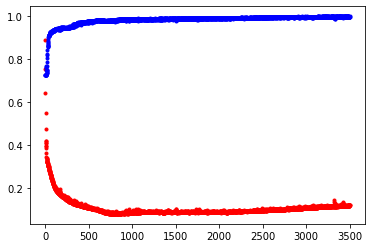

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)  # 전체 샘플 중 15%만 불러옴

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
# 모델 학습과정을 history에 저장
# batch_size는 한번 딥러닝 가동될 때 입력하는 크기
# validation_split : 불러온 샘플 중 33%를 테스트셋으로 사용
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
# 'acc'를 'accuracy'로 변경.
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()


# 학습 자동 중단

In [4]:
# 학습이 진행될수록 학습셋의 정확도는 올라가지만 과적합 때문에 테스트셋의 실험 결과는 점점 나빠지는 것을 확인할 수 있음
# EarlyStopping() 함수를 이용해 테스트셋 오차가 줄지 않으면 학습을 멈추도록 함.

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 자동 중단 설정
# patience 테스트 오차가 좋아지지 않아도 100번까지는 기다림
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# 에포크를 2000으로 설정했지만 그 전에 멈추는 것을 확인할 수 있음.

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 0s 206us/step - loss: 1.2415 - accuracy: 0.7256 - val_loss: 0.7791 - val_accuracy: 0.7744
Epoch 2/2000
780/780 [==============================] - 0s 12us/step - loss: 1.0532 - accuracy: 0.7256 - val_loss: 0.6566 - val_accuracy: 0.7744
Epoch 3/2000
780/780 [==============================] - 0s 9us/step - loss: 0.8796 - accuracy: 0.7256 - val_loss: 0.5557 - val_accuracy: 0.7744
Epoch 4/2000
780/780 [==============================] - 0s 8us/step - loss: 0.7424 - accuracy: 0.7256 - val_loss: 0.4743 - val_accuracy: 0.7744
Epoch 5/2000
780/780 [==============================] - 0s 9us/step - loss: 0.6306 - accuracy: 0.7256 - val_loss: 0.4092 - val_accuracy: 0.7744
Epoch 6/2000
780/780 [==============================] - 0s 9us/step - loss: 0.5397 - accuracy: 0.7256 - val_loss: 0.3660 - val_accuracy: 0.7744
Epoch 7/2000
780/780 [==============================] - 0s 8us/step - loss: 0.4785 - ac

780/780 [==============================] - 0s 9us/step - loss: 0.3016 - accuracy: 0.9192 - val_loss: 0.2379 - val_accuracy: 0.9436
Epoch 58/2000
780/780 [==============================] - 0s 9us/step - loss: 0.2999 - accuracy: 0.9231 - val_loss: 0.2369 - val_accuracy: 0.9436
Epoch 59/2000
780/780 [==============================] - 0s 9us/step - loss: 0.2982 - accuracy: 0.9231 - val_loss: 0.2363 - val_accuracy: 0.9385
Epoch 60/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2967 - accuracy: 0.9256 - val_loss: 0.2353 - val_accuracy: 0.9333
Epoch 61/2000
780/780 [==============================] - 0s 11us/step - loss: 0.2951 - accuracy: 0.9244 - val_loss: 0.2333 - val_accuracy: 0.9333
Epoch 62/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2933 - accuracy: 0.9244 - val_loss: 0.2303 - val_accuracy: 0.9385
Epoch 63/2000
780/780 [==============================] - 0s 9us/step - loss: 0.2916 - accuracy: 0.9231 - val_loss: 0.2277 - val_accuracy: 0.938

780/780 [==============================] - 0s 8us/step - loss: 0.2302 - accuracy: 0.9372 - val_loss: 0.1713 - val_accuracy: 0.9487
Epoch 114/2000
780/780 [==============================] - 0s 9us/step - loss: 0.2290 - accuracy: 0.9385 - val_loss: 0.1729 - val_accuracy: 0.9487
Epoch 115/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2282 - accuracy: 0.9385 - val_loss: 0.1750 - val_accuracy: 0.9487
Epoch 116/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2280 - accuracy: 0.9410 - val_loss: 0.1748 - val_accuracy: 0.9487
Epoch 117/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2272 - accuracy: 0.9410 - val_loss: 0.1711 - val_accuracy: 0.9487
Epoch 118/2000
780/780 [==============================] - 0s 8us/step - loss: 0.2262 - accuracy: 0.9397 - val_loss: 0.1687 - val_accuracy: 0.9487
Epoch 119/2000
780/780 [==============================] - 0s 9us/step - loss: 0.2253 - accuracy: 0.9397 - val_loss: 0.1682 - val_accuracy: 

780/780 [==============================] - 0s 6us/step - loss: 0.1978 - accuracy: 0.9449 - val_loss: 0.1538 - val_accuracy: 0.9590
Epoch 170/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1972 - accuracy: 0.9462 - val_loss: 0.1496 - val_accuracy: 0.9590
Epoch 171/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1967 - accuracy: 0.9410 - val_loss: 0.1478 - val_accuracy: 0.9590
Epoch 172/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1959 - accuracy: 0.9397 - val_loss: 0.1454 - val_accuracy: 0.9590
Epoch 173/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1972 - accuracy: 0.9385 - val_loss: 0.1458 - val_accuracy: 0.9590
Epoch 174/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1947 - accuracy: 0.9410 - val_loss: 0.1523 - val_accuracy: 0.9590
Epoch 175/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1960 - accuracy: 0.9449 - val_loss: 0.1561 - val_accuracy:

780/780 [==============================] - 0s 8us/step - loss: 0.1731 - accuracy: 0.9462 - val_loss: 0.1357 - val_accuracy: 0.9590
Epoch 226/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1718 - accuracy: 0.9462 - val_loss: 0.1313 - val_accuracy: 0.9641
Epoch 227/2000
780/780 [==============================] - 0s 7us/step - loss: 0.1723 - accuracy: 0.9462 - val_loss: 0.1303 - val_accuracy: 0.9641
Epoch 228/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1722 - accuracy: 0.9462 - val_loss: 0.1330 - val_accuracy: 0.9641
Epoch 229/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1707 - accuracy: 0.9462 - val_loss: 0.1406 - val_accuracy: 0.9590
Epoch 230/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1719 - accuracy: 0.9474 - val_loss: 0.1394 - val_accuracy: 0.9590
Epoch 231/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1710 - accuracy: 0.9487 - val_loss: 0.1334 - val_accuracy

780/780 [==============================] - 0s 8us/step - loss: 0.1501 - accuracy: 0.9538 - val_loss: 0.1232 - val_accuracy: 0.9692
Epoch 282/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1492 - accuracy: 0.9526 - val_loss: 0.1193 - val_accuracy: 0.9744
Epoch 283/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1487 - accuracy: 0.9500 - val_loss: 0.1167 - val_accuracy: 0.9692
Epoch 284/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1487 - accuracy: 0.9487 - val_loss: 0.1191 - val_accuracy: 0.9744
Epoch 285/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1475 - accuracy: 0.9513 - val_loss: 0.1246 - val_accuracy: 0.9590
Epoch 286/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1486 - accuracy: 0.9577 - val_loss: 0.1216 - val_accuracy: 0.9641
Epoch 287/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1492 - accuracy: 0.9513 - val_loss: 0.1156 - val_accuracy: 

780/780 [==============================] - 0s 10us/step - loss: 0.1299 - accuracy: 0.9654 - val_loss: 0.1089 - val_accuracy: 0.9641
Epoch 338/2000
780/780 [==============================] - 0s 12us/step - loss: 0.1301 - accuracy: 0.9679 - val_loss: 0.1094 - val_accuracy: 0.9692
Epoch 339/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1293 - accuracy: 0.9654 - val_loss: 0.1068 - val_accuracy: 0.9641
Epoch 340/2000
780/780 [==============================] - 0s 23us/step - loss: 0.1303 - accuracy: 0.9628 - val_loss: 0.1086 - val_accuracy: 0.9641
Epoch 341/2000
780/780 [==============================] - 0s 12us/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.1153 - val_accuracy: 0.9744
Epoch 342/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1302 - accuracy: 0.9679 - val_loss: 0.1076 - val_accuracy: 0.9641
Epoch 343/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1281 - accuracy: 0.9641 - val_loss: 0.1044 - val_accu

Epoch 393/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1170 - accuracy: 0.9692 - val_loss: 0.0987 - val_accuracy: 0.9692
Epoch 394/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1168 - accuracy: 0.9692 - val_loss: 0.1015 - val_accuracy: 0.9744
Epoch 395/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1161 - accuracy: 0.9718 - val_loss: 0.1048 - val_accuracy: 0.9744
Epoch 396/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1170 - accuracy: 0.9718 - val_loss: 0.1013 - val_accuracy: 0.9692
Epoch 397/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1156 - accuracy: 0.9705 - val_loss: 0.0979 - val_accuracy: 0.9692
Epoch 398/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1166 - accuracy: 0.9692 - val_loss: 0.0975 - val_accuracy: 0.9692
Epoch 399/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1166 - accuracy: 0.9692 - val_loss: 0.1009 

780/780 [==============================] - 0s 8us/step - loss: 0.1060 - accuracy: 0.9744 - val_loss: 0.0956 - val_accuracy: 0.9744
Epoch 450/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1061 - accuracy: 0.9744 - val_loss: 0.0966 - val_accuracy: 0.9744
Epoch 451/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1060 - accuracy: 0.9744 - val_loss: 0.0940 - val_accuracy: 0.9744
Epoch 452/2000
780/780 [==============================] - 0s 8us/step - loss: 0.1054 - accuracy: 0.9731 - val_loss: 0.0950 - val_accuracy: 0.9744
Epoch 453/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1059 - accuracy: 0.9744 - val_loss: 0.0958 - val_accuracy: 0.9744
Epoch 454/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1051 - accuracy: 0.9731 - val_loss: 0.0930 - val_accuracy: 0.9744
Epoch 455/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1057 - accuracy: 0.9731 - val_loss: 0.0940 - val_accuracy:

780/780 [==============================] - 0s 7us/step - loss: 0.0985 - accuracy: 0.9744 - val_loss: 0.0863 - val_accuracy: 0.9846
Epoch 506/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1004 - accuracy: 0.9731 - val_loss: 0.0892 - val_accuracy: 0.9795
Epoch 507/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0965 - accuracy: 0.9756 - val_loss: 0.0941 - val_accuracy: 0.9795
Epoch 508/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0975 - accuracy: 0.9782 - val_loss: 0.0903 - val_accuracy: 0.9795
Epoch 509/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0968 - accuracy: 0.9756 - val_loss: 0.0871 - val_accuracy: 0.9846
Epoch 510/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0969 - accuracy: 0.9756 - val_loss: 0.0888 - val_accuracy: 0.9795
Epoch 511/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0958 - accuracy: 0.9756 - val_loss: 0.0931 - val_accuracy: 

780/780 [==============================] - 0s 9us/step - loss: 0.0902 - accuracy: 0.9756 - val_loss: 0.0841 - val_accuracy: 0.9846
Epoch 562/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0881 - accuracy: 0.9769 - val_loss: 0.0905 - val_accuracy: 0.9744
Epoch 563/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0907 - accuracy: 0.9795 - val_loss: 0.0886 - val_accuracy: 0.9744
Epoch 564/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0879 - accuracy: 0.9782 - val_loss: 0.0825 - val_accuracy: 0.9846
Epoch 565/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0905 - accuracy: 0.9744 - val_loss: 0.0824 - val_accuracy: 0.9846
Epoch 566/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0895 - accuracy: 0.9756 - val_loss: 0.0879 - val_accuracy: 0.9795
Epoch 567/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0887 - accuracy: 0.9782 - val_loss: 0.0954 - val_accuracy: 

780/780 [==============================] - 0s 7us/step - loss: 0.0830 - accuracy: 0.9756 - val_loss: 0.0801 - val_accuracy: 0.9846
Epoch 618/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0813 - accuracy: 0.9795 - val_loss: 0.0853 - val_accuracy: 0.9795
Epoch 619/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0816 - accuracy: 0.9795 - val_loss: 0.0849 - val_accuracy: 0.9795
Epoch 620/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0814 - accuracy: 0.9795 - val_loss: 0.0806 - val_accuracy: 0.9846
Epoch 621/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0807 - accuracy: 0.9782 - val_loss: 0.0813 - val_accuracy: 0.9846
Epoch 622/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0803 - accuracy: 0.9782 - val_loss: 0.0844 - val_accuracy: 0.9795
Epoch 623/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0805 - accuracy: 0.9795 - val_loss: 0.0870 - val_accuracy:

Epoch 673/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0745 - accuracy: 0.9795 - val_loss: 0.0872 - val_accuracy: 0.9795
Epoch 674/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0749 - accuracy: 0.9769 - val_loss: 0.0804 - val_accuracy: 0.9795
Epoch 675/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0735 - accuracy: 0.9808 - val_loss: 0.0786 - val_accuracy: 0.9795
Epoch 676/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0753 - accuracy: 0.9782 - val_loss: 0.0809 - val_accuracy: 0.9795
Epoch 677/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0746 - accuracy: 0.9782 - val_loss: 0.0879 - val_accuracy: 0.9795
Epoch 678/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0750 - accuracy: 0.9782 - val_loss: 0.0797 - val_accuracy: 0.9795
Epoch 679/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0740 - accuracy: 0.9795 - val_loss: 0.0776 

780/780 [==============================] - 0s 9us/step - loss: 0.0680 - accuracy: 0.9795 - val_loss: 0.0814 - val_accuracy: 0.9744
Epoch 730/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0684 - accuracy: 0.9821 - val_loss: 0.0749 - val_accuracy: 0.9744
Epoch 731/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0677 - accuracy: 0.9821 - val_loss: 0.0732 - val_accuracy: 0.9744
Epoch 732/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0689 - accuracy: 0.9808 - val_loss: 0.0756 - val_accuracy: 0.9744
Epoch 733/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0770 - val_accuracy: 0.9744
Epoch 734/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0669 - accuracy: 0.9808 - val_loss: 0.0746 - val_accuracy: 0.9744
Epoch 735/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.0745 - val_accuracy: 

Epoch 785/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0706 - val_accuracy: 0.9744
Epoch 786/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0705 - val_accuracy: 0.9744
Epoch 787/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0735 - val_accuracy: 0.9744
Epoch 788/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0762 - val_accuracy: 0.9744
Epoch 789/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0742 - val_accuracy: 0.9744
Epoch 790/2000
780/780 [==============================] - 0s 7us/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0728 - val_accuracy: 0.9744
Epoch 791/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0706 -

780/780 [==============================] - 0s 8us/step - loss: 0.0588 - accuracy: 0.9808 - val_loss: 0.0688 - val_accuracy: 0.9744
Epoch 842/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.0676 - val_accuracy: 0.9795
Epoch 843/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.0696 - val_accuracy: 0.9744
Epoch 844/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0596 - accuracy: 0.9833 - val_loss: 0.0719 - val_accuracy: 0.9744
Epoch 845/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0575 - accuracy: 0.9833 - val_loss: 0.0687 - val_accuracy: 0.9744
Epoch 846/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0586 - accuracy: 0.9846 - val_loss: 0.0685 - val_accuracy: 0.9744
Epoch 847/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0595 - accuracy: 0.9846 - val_loss: 0.0715 - val_accuracy:

780/780 [==============================] - 0s 9us/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9744
Epoch 898/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.0678 - val_accuracy: 0.9744
Epoch 899/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0677 - val_accuracy: 0.9744
Epoch 900/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9744
Epoch 901/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0544 - accuracy: 0.9859 - val_loss: 0.0719 - val_accuracy: 0.9744
Epoch 902/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0550 - accuracy: 0.9846 - val_loss: 0.0699 - val_accuracy: 0.9744
Epoch 903/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0560 - accuracy: 0.9846 - val_loss: 0.0674 - val_accuracy:

780/780 [==============================] - 0s 9us/step - loss: 0.0529 - accuracy: 0.9846 - val_loss: 0.0729 - val_accuracy: 0.9744
Epoch 954/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0663 - val_accuracy: 0.9744
Epoch 955/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0537 - accuracy: 0.9846 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 956/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0701 - val_accuracy: 0.9744
Epoch 957/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0512 - accuracy: 0.9859 - val_loss: 0.0748 - val_accuracy: 0.9744
Epoch 958/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0698 - val_accuracy: 0.9744
Epoch 959/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.0648 - val_accuracy:

780/780 [==============================] - 0s 8us/step - loss: 0.0497 - accuracy: 0.9833 - val_loss: 0.0722 - val_accuracy: 0.9744
Epoch 1010/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0646 - val_accuracy: 0.9744
Epoch 1011/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0487 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9795
Epoch 1012/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9744
Epoch 1013/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0482 - accuracy: 0.9859 - val_loss: 0.0685 - val_accuracy: 0.9744
Epoch 1014/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0672 - val_accuracy: 0.9744
Epoch 1015/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0476 - accuracy: 0.9872 - val_loss: 0.0654 - val_acc

Epoch 1065/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0466 - accuracy: 0.9846 - val_loss: 0.0646 - val_accuracy: 0.9744
Epoch 1066/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0462 - accuracy: 0.9846 - val_loss: 0.0686 - val_accuracy: 0.9744
Epoch 1067/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9744
Epoch 1068/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0455 - accuracy: 0.9846 - val_loss: 0.0625 - val_accuracy: 0.9744
Epoch 1069/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0651 - val_accuracy: 0.9744
Epoch 1070/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0451 - accuracy: 0.9872 - val_loss: 0.0683 - val_accuracy: 0.9744
Epoch 1071/2000
780/780 [==============================] - 0s 4us/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0

Epoch 1121/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9744
Epoch 1122/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0663 - val_accuracy: 0.9795
Epoch 1123/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 1124/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0624 - val_accuracy: 0.9744
Epoch 1125/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9744
Epoch 1126/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0427 - accuracy: 0.9885 - val_loss: 0.0658 - val_accuracy: 0.9795
Epoch 1127/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0431 - accuracy: 0.9846 - val_loss: 0

780/780 [==============================] - 0s 8us/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0612 - val_accuracy: 0.9744
Epoch 1177/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.0602 - val_accuracy: 0.9744
Epoch 1178/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0598 - val_accuracy: 0.9744
Epoch 1179/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0611 - val_accuracy: 0.9744
Epoch 1180/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0404 - accuracy: 0.9846 - val_loss: 0.0649 - val_accuracy: 0.9795
Epoch 1181/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.0637 - val_accuracy: 0.9795
Epoch 1182/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0404 - accuracy: 0.9846 - val_loss: 0.0615 - val_acc

Epoch 1232/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0384 - accuracy: 0.9846 - val_loss: 0.0624 - val_accuracy: 0.9795
Epoch 1233/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0382 - accuracy: 0.9846 - val_loss: 0.0603 - val_accuracy: 0.9795
Epoch 1234/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0602 - val_accuracy: 0.9795
Epoch 1235/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0629 - val_accuracy: 0.9795
Epoch 1236/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0384 - accuracy: 0.9846 - val_loss: 0.0628 - val_accuracy: 0.9795
Epoch 1237/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0379 - accuracy: 0.9859 - val_loss: 0.0598 - val_accuracy: 0.9795
Epoch 1238/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 

780/780 [==============================] - 0s 9us/step - loss: 0.0358 - accuracy: 0.9859 - val_loss: 0.0583 - val_accuracy: 0.9744
Epoch 1288/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.0596 - val_accuracy: 0.9795
Epoch 1289/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0635 - val_accuracy: 0.9795
Epoch 1290/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0659 - val_accuracy: 0.9795
Epoch 1291/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0623 - val_accuracy: 0.9795
Epoch 1292/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0369 - accuracy: 0.9872 - val_loss: 0.0586 - val_accuracy: 0.9795
Epoch 1293/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0594 - val_accu

Epoch 1343/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0571 - val_accuracy: 0.9795
Epoch 1344/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0346 - accuracy: 0.9872 - val_loss: 0.0632 - val_accuracy: 0.9795
Epoch 1345/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0362 - accuracy: 0.9859 - val_loss: 0.0597 - val_accuracy: 0.9795
Epoch 1346/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0342 - accuracy: 0.9859 - val_loss: 0.0561 - val_accuracy: 0.9846
Epoch 1347/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0357 - accuracy: 0.9859 - val_loss: 0.0565 - val_accuracy: 0.9846
Epoch 1348/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9795
Epoch 1349/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0364 - accuracy: 0.9859 - val_los

780/780 [==============================] - 0s 8us/step - loss: 0.0361 - accuracy: 0.9859 - val_loss: 0.0552 - val_accuracy: 0.9846
Epoch 1399/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0351 - accuracy: 0.9859 - val_loss: 0.0601 - val_accuracy: 0.9795
Epoch 1400/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0345 - accuracy: 0.9872 - val_loss: 0.0595 - val_accuracy: 0.9795
Epoch 1401/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0323 - accuracy: 0.9846 - val_loss: 0.0570 - val_accuracy: 0.9846
Epoch 1402/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0340 - accuracy: 0.9872 - val_loss: 0.0583 - val_accuracy: 0.9795
Epoch 1403/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0650 - val_accuracy: 0.9795
Epoch 1404/2000
780/780 [==============================] - 0s 7us/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0695 - val_accu

Epoch 1454/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0342 - accuracy: 0.9872 - val_loss: 0.0569 - val_accuracy: 0.9795
Epoch 1455/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0314 - accuracy: 0.9885 - val_loss: 0.0560 - val_accuracy: 0.9795
Epoch 1456/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0581 - val_accuracy: 0.9795
Epoch 1457/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0316 - accuracy: 0.9885 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 1458/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.0618 - val_accuracy: 0.9795
Epoch 1459/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0319 - accuracy: 0.9885 - val_loss: 0.0567 - val_accuracy: 0.9846
Epoch 1460/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0317 - accuracy: 0.9885 - val_loss:

Epoch 1510/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0295 - accuracy: 0.9885 - val_loss: 0.0584 - val_accuracy: 0.9795
Epoch 1511/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0305 - accuracy: 0.9885 - val_loss: 0.0590 - val_accuracy: 0.9795
Epoch 1512/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0611 - val_accuracy: 0.9795
Epoch 1513/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0300 - accuracy: 0.9859 - val_loss: 0.0593 - val_accuracy: 0.9795
Epoch 1514/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0320 - accuracy: 0.9872 - val_loss: 0.0578 - val_accuracy: 0.9795
Epoch 1515/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0306 - accuracy: 0.9859 - val_loss: 0.0603 - val_accuracy: 0.9795
Epoch 1516/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0300 - accuracy: 0.9872 - val_loss: 0

# 모델 업데이트 함수 + 학습 자동 중단 함수 전체 코드

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])




Epoch 00001: val_loss improved from inf to 0.77907, saving model to ./model/01-0.7791.hdf5

Epoch 00002: val_loss improved from 0.77907 to 0.65665, saving model to ./model/02-0.6566.hdf5

Epoch 00003: val_loss improved from 0.65665 to 0.55570, saving model to ./model/03-0.5557.hdf5

Epoch 00004: val_loss improved from 0.55570 to 0.47428, saving model to ./model/04-0.4743.hdf5

Epoch 00005: val_loss improved from 0.47428 to 0.40945, saving model to ./model/05-0.4095.hdf5

Epoch 00006: val_loss improved from 0.40945 to 0.36607, saving model to ./model/06-0.3661.hdf5

Epoch 00007: val_loss improved from 0.36607 to 0.35365, saving model to ./model/07-0.3537.hdf5

Epoch 00008: val_loss did not improve from 0.35365

Epoch 00009: val_loss did not improve from 0.35365

Epoch 00010: val_loss did not improve from 0.35365

Epoch 00011: val_loss did not improve from 0.35365

Epoch 00012: val_loss did not improve from 0.35365

Epoch 00013: val_loss improved from 0.35365 to 0.33839, saving model to


Epoch 00098: val_loss improved from 0.18691 to 0.18608, saving model to ./model/98-0.1861.hdf5

Epoch 00099: val_loss did not improve from 0.18608

Epoch 00100: val_loss did not improve from 0.18608

Epoch 00101: val_loss improved from 0.18608 to 0.18416, saving model to ./model/101-0.1842.hdf5

Epoch 00102: val_loss improved from 0.18416 to 0.18354, saving model to ./model/102-0.1835.hdf5

Epoch 00103: val_loss improved from 0.18354 to 0.18243, saving model to ./model/103-0.1824.hdf5

Epoch 00104: val_loss improved from 0.18243 to 0.17974, saving model to ./model/104-0.1797.hdf5

Epoch 00105: val_loss improved from 0.17974 to 0.17700, saving model to ./model/105-0.1770.hdf5

Epoch 00106: val_loss improved from 0.17700 to 0.17540, saving model to ./model/106-0.1754.hdf5

Epoch 00107: val_loss improved from 0.17540 to 0.17475, saving model to ./model/107-0.1747.hdf5

Epoch 00108: val_loss did not improve from 0.17475

Epoch 00109: val_loss did not improve from 0.17475

Epoch 00110: val

Epoch 00237: val_loss did not improve from 0.12913

Epoch 00238: val_loss improved from 0.12913 to 0.12868, saving model to ./model/238-0.1287.hdf5

Epoch 00239: val_loss did not improve from 0.12868

Epoch 00240: val_loss did not improve from 0.12868

Epoch 00241: val_loss did not improve from 0.12868

Epoch 00242: val_loss did not improve from 0.12868

Epoch 00243: val_loss improved from 0.12868 to 0.12855, saving model to ./model/243-0.1286.hdf5

Epoch 00244: val_loss improved from 0.12855 to 0.12774, saving model to ./model/244-0.1277.hdf5

Epoch 00245: val_loss improved from 0.12774 to 0.12615, saving model to ./model/245-0.1262.hdf5

Epoch 00246: val_loss improved from 0.12615 to 0.12563, saving model to ./model/246-0.1256.hdf5

Epoch 00247: val_loss did not improve from 0.12563

Epoch 00248: val_loss did not improve from 0.12563

Epoch 00249: val_loss did not improve from 0.12563

Epoch 00250: val_loss did not improve from 0.12563

Epoch 00251: val_loss did not improve from 0.12

Epoch 00383: val_loss did not improve from 0.10005

Epoch 00384: val_loss did not improve from 0.10005

Epoch 00385: val_loss did not improve from 0.10005

Epoch 00386: val_loss did not improve from 0.10005

Epoch 00387: val_loss did not improve from 0.10005

Epoch 00388: val_loss did not improve from 0.10005

Epoch 00389: val_loss did not improve from 0.10005

Epoch 00390: val_loss did not improve from 0.10005

Epoch 00391: val_loss did not improve from 0.10005

Epoch 00392: val_loss did not improve from 0.10005

Epoch 00393: val_loss improved from 0.10005 to 0.09876, saving model to ./model/393-0.0988.hdf5

Epoch 00394: val_loss did not improve from 0.09876

Epoch 00395: val_loss did not improve from 0.09876

Epoch 00396: val_loss did not improve from 0.09876

Epoch 00397: val_loss improved from 0.09876 to 0.09801, saving model to ./model/397-0.0980.hdf5

Epoch 00398: val_loss improved from 0.09801 to 0.09748, saving model to ./model/398-0.0975.hdf5

Epoch 00399: val_loss did not imp


Epoch 00526: val_loss improved from 0.08634 to 0.08616, saving model to ./model/526-0.0862.hdf5

Epoch 00527: val_loss did not improve from 0.08616

Epoch 00528: val_loss did not improve from 0.08616

Epoch 00529: val_loss improved from 0.08616 to 0.08588, saving model to ./model/529-0.0859.hdf5

Epoch 00530: val_loss did not improve from 0.08588

Epoch 00531: val_loss did not improve from 0.08588

Epoch 00532: val_loss did not improve from 0.08588

Epoch 00533: val_loss did not improve from 0.08588

Epoch 00534: val_loss did not improve from 0.08588

Epoch 00535: val_loss did not improve from 0.08588

Epoch 00536: val_loss did not improve from 0.08588

Epoch 00537: val_loss did not improve from 0.08588

Epoch 00538: val_loss did not improve from 0.08588

Epoch 00539: val_loss did not improve from 0.08588

Epoch 00540: val_loss did not improve from 0.08588

Epoch 00541: val_loss improved from 0.08588 to 0.08569, saving model to ./model/541-0.0857.hdf5

Epoch 00542: val_loss did not im


Epoch 00675: val_loss improved from 0.07857 to 0.07848, saving model to ./model/675-0.0785.hdf5

Epoch 00676: val_loss did not improve from 0.07848

Epoch 00677: val_loss did not improve from 0.07848

Epoch 00678: val_loss did not improve from 0.07848

Epoch 00679: val_loss improved from 0.07848 to 0.07780, saving model to ./model/679-0.0778.hdf5

Epoch 00680: val_loss did not improve from 0.07780

Epoch 00681: val_loss did not improve from 0.07780

Epoch 00682: val_loss did not improve from 0.07780

Epoch 00683: val_loss improved from 0.07780 to 0.07750, saving model to ./model/683-0.0775.hdf5

Epoch 00684: val_loss did not improve from 0.07750

Epoch 00685: val_loss did not improve from 0.07750

Epoch 00686: val_loss did not improve from 0.07750

Epoch 00687: val_loss improved from 0.07750 to 0.07732, saving model to ./model/687-0.0773.hdf5

Epoch 00688: val_loss did not improve from 0.07732

Epoch 00689: val_loss did not improve from 0.07732

Epoch 00690: val_loss did not improve f


Epoch 00829: val_loss did not improve from 0.06973

Epoch 00830: val_loss did not improve from 0.06973

Epoch 00831: val_loss did not improve from 0.06973

Epoch 00832: val_loss did not improve from 0.06973

Epoch 00833: val_loss improved from 0.06973 to 0.06947, saving model to ./model/833-0.0695.hdf5

Epoch 00834: val_loss did not improve from 0.06947

Epoch 00835: val_loss did not improve from 0.06947

Epoch 00836: val_loss did not improve from 0.06947

Epoch 00837: val_loss did not improve from 0.06947

Epoch 00838: val_loss did not improve from 0.06947

Epoch 00839: val_loss did not improve from 0.06947

Epoch 00840: val_loss did not improve from 0.06947

Epoch 00841: val_loss did not improve from 0.06947

Epoch 00842: val_loss improved from 0.06947 to 0.06823, saving model to ./model/842-0.0682.hdf5

Epoch 00843: val_loss did not improve from 0.06823

Epoch 00844: val_loss did not improve from 0.06823

Epoch 00845: val_loss did not improve from 0.06823

Epoch 00846: val_loss did


Epoch 01008: val_loss did not improve from 0.06254

Epoch 01009: val_loss did not improve from 0.06254

Epoch 01010: val_loss did not improve from 0.06254

Epoch 01011: val_loss did not improve from 0.06254

Epoch 01012: val_loss did not improve from 0.06254

Epoch 01013: val_loss did not improve from 0.06254

Epoch 01014: val_loss did not improve from 0.06254

Epoch 01015: val_loss did not improve from 0.06254

Epoch 01016: val_loss did not improve from 0.06254

Epoch 01017: val_loss did not improve from 0.06254

Epoch 01018: val_loss did not improve from 0.06254

Epoch 01019: val_loss did not improve from 0.06254

Epoch 01020: val_loss did not improve from 0.06254

Epoch 01021: val_loss did not improve from 0.06254

Epoch 01022: val_loss did not improve from 0.06254

Epoch 01023: val_loss did not improve from 0.06254

Epoch 01024: val_loss did not improve from 0.06254

Epoch 01025: val_loss did not improve from 0.06254

Epoch 01026: val_loss did not improve from 0.06254

Epoch 01027


Epoch 01170: val_loss did not improve from 0.05921

Epoch 01171: val_loss did not improve from 0.05921

Epoch 01172: val_loss did not improve from 0.05921

Epoch 01173: val_loss did not improve from 0.05921

Epoch 01174: val_loss did not improve from 0.05921

Epoch 01175: val_loss did not improve from 0.05921

Epoch 01176: val_loss did not improve from 0.05921

Epoch 01177: val_loss did not improve from 0.05921

Epoch 01178: val_loss did not improve from 0.05921

Epoch 01179: val_loss did not improve from 0.05921

Epoch 01180: val_loss did not improve from 0.05921

Epoch 01181: val_loss did not improve from 0.05921

Epoch 01182: val_loss did not improve from 0.05921

Epoch 01183: val_loss did not improve from 0.05921

Epoch 01184: val_loss did not improve from 0.05921

Epoch 01185: val_loss did not improve from 0.05921

Epoch 01186: val_loss improved from 0.05921 to 0.05837, saving model to ./model/1186-0.0584.hdf5

Epoch 01187: val_loss did not improve from 0.05837

Epoch 01188: val_


Epoch 01332: val_loss did not improve from 0.05644

Epoch 01333: val_loss did not improve from 0.05644

Epoch 01334: val_loss did not improve from 0.05644

Epoch 01335: val_loss did not improve from 0.05644

Epoch 01336: val_loss did not improve from 0.05644

Epoch 01337: val_loss did not improve from 0.05644

Epoch 01338: val_loss did not improve from 0.05644

Epoch 01339: val_loss did not improve from 0.05644

Epoch 01340: val_loss did not improve from 0.05644

Epoch 01341: val_loss did not improve from 0.05644

Epoch 01342: val_loss did not improve from 0.05644

Epoch 01343: val_loss did not improve from 0.05644

Epoch 01344: val_loss did not improve from 0.05644

Epoch 01345: val_loss did not improve from 0.05644

Epoch 01346: val_loss improved from 0.05644 to 0.05602, saving model to ./model/1346-0.0560.hdf5

Epoch 01347: val_loss did not improve from 0.05602

Epoch 01348: val_loss did not improve from 0.05602

Epoch 01349: val_loss did not improve from 0.05602

Epoch 01350: val_


Epoch 01492: val_loss did not improve from 0.05477

Epoch 01493: val_loss did not improve from 0.05477

Epoch 01494: val_loss did not improve from 0.05477

Epoch 01495: val_loss did not improve from 0.05477

Epoch 01496: val_loss did not improve from 0.05477

Epoch 01497: val_loss did not improve from 0.05477

Epoch 01498: val_loss did not improve from 0.05477
